In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)

banking = pd.read_csv('banking.csv')

banking.shape

(41188, 22)

In [2]:
# Deleting the index column of the dataset. 

banking = banking.drop(columns = 'Unnamed: 0')

In [3]:
# Processing the features:

# To be able to input data into a machine learning model, there is a need to convert categorical variables
# into numerical ones. However, encoding them directly as 0, 1, 2, ... n may create bias in the dataset
# as the number line naturally has meaning. We use pandas.get_dummies to create columns per category, as in vectorizing.

# But we only apply get_dummies to our features (independent variables).

df = pd.get_dummies(banking.drop('"y"\n', axis = 1))

In [4]:
# Upon viewing the features, they are all numerical.

df.head()

,"""age""","""duration""","""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""job""_""admin.""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""","""job""_""management""","""job""_""retired""","""job""_""self-employed""","""job""_""services""","""job""_""student""","""job""_""technician""","""job""_""unemployed""","""job""_""unknown""","""marital""_""divorced""","""marital""_""married""","""marital""_""single""","""marital""_""unknown""","""education""_""basic.4y""","""education""_""basic.6y""","""education""_""basic.9y""","""education""_""high.school""","""education""_""illiterate""","""education""_""professional.course""","""education""_""university.degree""","""education""_""unknown""","""default""_""no""","""default""_""unknown""","""default""_""yes""","""housing""_""no""","""housing""_""unknown""","""housing""_""yes""","""loan""_""no""","""loan""_""unknown""","""loan""_""yes""","""contact""_""cellular""","""contact""_""telephone""","""month""_""apr""","""month""_""aug""","""month""_""dec""","""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""day_of_week""_""fri""","""day_of_week""_""mon""","""day_of_week""_""thu""","""day_of_week""_""tue""","""day_of_week""_""wed""","""poutcome""_""failure""","""poutcome""_""nonexistent""","""poutcome""_""success"""
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [5]:
# Processing the dependent variable (y).

# The dependent variable is either yes or no. 
# However, I had to use label encoder because the dependent variable isn't clean.
# See below:

banking['"y"\n'].head()

0    "no"\n
1    "no"\n
2    "no"\n
3    "no"\n
4    "no"\n
Name: "y"\n, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
df['y'] = le_y.fit_transform(banking['\"y\"\n'])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Target Object
y = df['y']

# Dependent Variables or Features
# First selecting all variables
X = df.drop(['y'], axis = 1, inplace = False)

# Splitting the dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1, test_size = 0.20)

# Using RandomForestClassifier Model
rfc = RandomForestClassifier()

# Testing the model and getting the error
rfc_allfeatures = rfc.fit(train_X, train_y)
predictions = rfc.predict(test_X)
pred_mae = mean_absolute_error(predictions, test_y)

print(pred_mae)

C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0949259529011896


=== Confusion Matrix ===
[[7081  213]
 [ 569  375]]


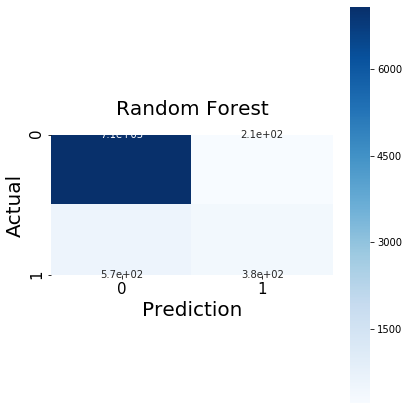

In [8]:
# Cross validating the model

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

#Graphing the confusion matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(test_y, predictions)
print(cm)

fig1, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, square = True, cmap = 'Blues')
sns.set(font_scale=1.4)
ax.set_xlabel('Prediction',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Actual',fontsize=20)
ax.set_title('Random Forest',fontsize=20,pad=20)
plt.tight_layout()
plt.savefig('confusion_matrix1.png',format='png',dpi=500)
plt.rcdefaults()

In [9]:
# Printing the Classification Report

print("=== Classification Report ===")
print(classification_report(test_y, predictions))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.64      0.40      0.49       944

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



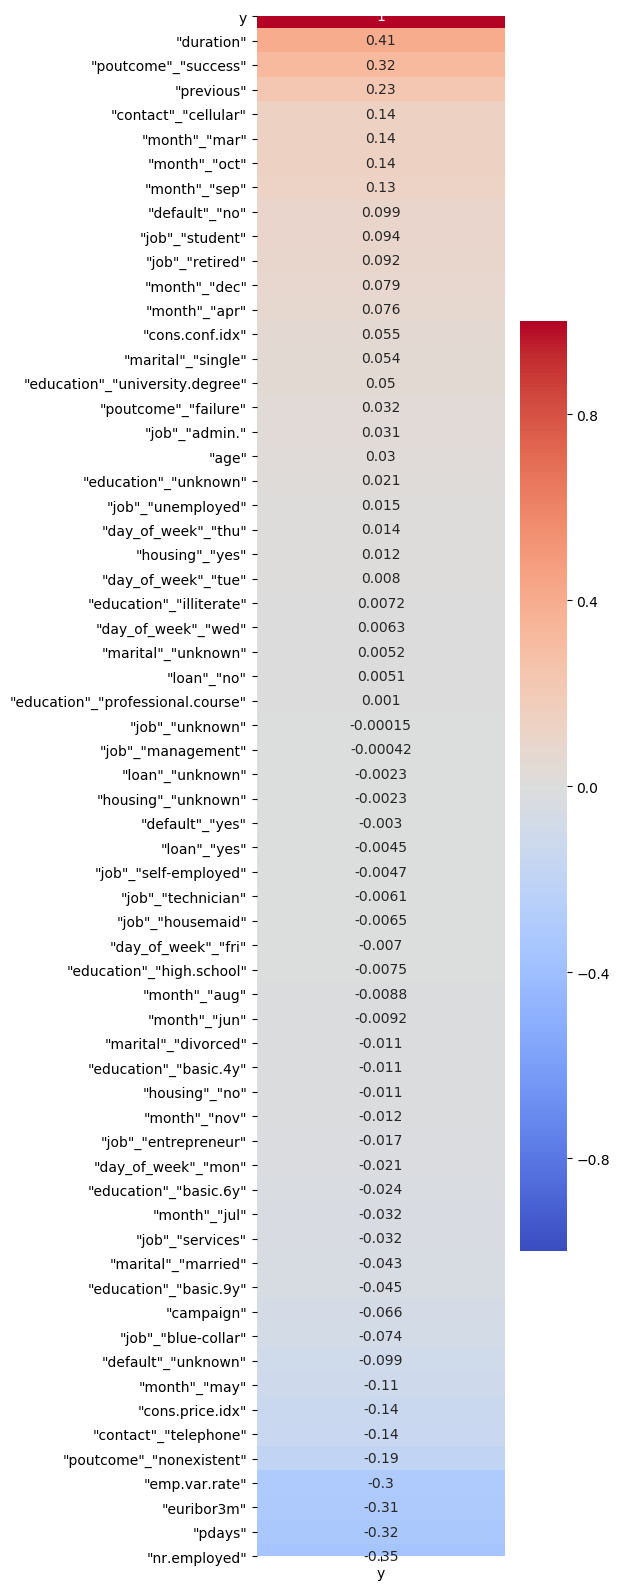

In [10]:
# Can we choose features to improve the model?

plt.figure(figsize=(4,20))
corr = df.corr()
sns.heatmap(corr[['y']].sort_values(by=['y'],ascending=False), vmin=-1, cmap='coolwarm', annot=True)

C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean absolute error is 0.10050983248361253
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.64      0.40      0.49       944

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



=== All AUC Scores ===
[0.63155367 0.61870784 0.40855347 0.55695227 0.59597416 0.54804148
 0.29793681 0.07715959 0.55197422 0.61724162]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.4904095131932336


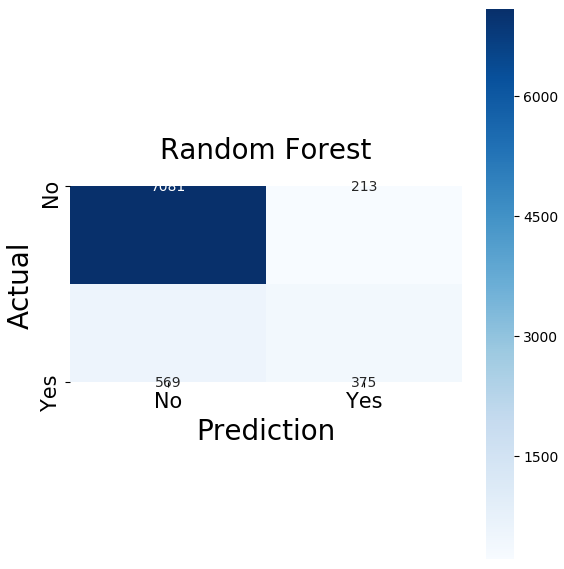

In [14]:
#Target Object
b = df['y']

#Dependent Variables or Features
#Selecting correlations above 0.15
# features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
#             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
A = df[['"duration"', '"poutcome"_"success"', '"nr.employed"', '"pdays"', '"euribor3m"',
       '"emp.var.rate"', '"previous"', '"poutcome"_"nonexistent"']]

train_X, test_X, train_y, test_y = train_test_split(A, b, random_state = 1, test_size = 0.20)

#Using RandomForestClassifier Model

rfc2 = RandomForestClassifier()

rfc_tenfeatures = rfc2.fit(train_X, train_y)
predictions2 = rfc2.predict(test_X)
pred_mae = mean_absolute_error(predictions2, test_y)
print('The mean absolute error is ' + str(pred_mae))

rfc_cv_score2 = cross_val_score(rfc2, A, b, cv=10, scoring='roc_auc')

print("=== Classification Report ===")
print(classification_report(test_y, predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score2)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score2.mean())

#================================================================
confusionM = confusion_matrix(test_y, predictions)
confusionM = pd.DataFrame(confusionM,['No','Yes'],['No','Yes'])
#================================================================
fig1, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusionM, annot=True, fmt=".0f", square = True, cmap = 'Blues')
sns.set(font_scale=1.4)
ax.set_xlabel('Prediction',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Actual',fontsize=20)
ax.set_title('Random Forest',fontsize=20,pad=20)
plt.tight_layout()
plt.savefig('confusion_matrix1.png',format='png',dpi=500)
plt.rcdefaults()

In [12]:
# Adjusting the number of trees using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rfc, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(train_X, train_y)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean absolute error is 0.08800679776644817
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.64      0.40      0.49       944

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



=== All AUC Scores ===
[0.19307249 0.88103507 0.7396593  0.83045515 0.87667844 0.70885419
 0.58058399 0.20900573 0.71990839 0.62301587]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6362268631101843


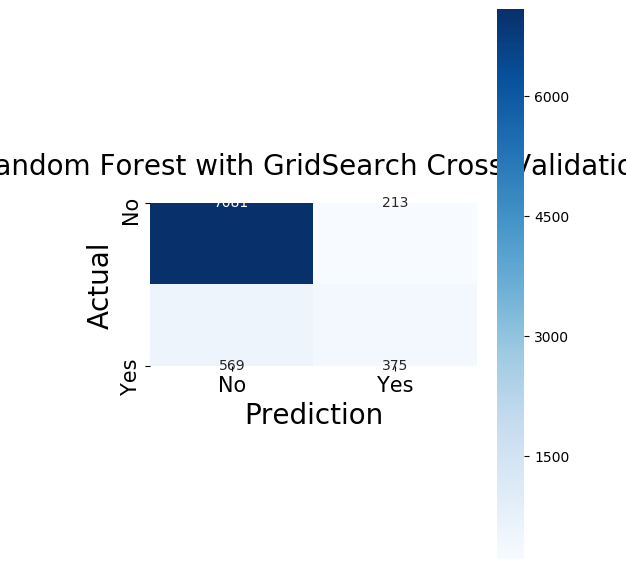

In [13]:
#Target Object
y= df['y']

#Dependent Variables or Features
X = df.drop(['y'], axis = 1, inplace = False)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1, test_size = 0.20)

#Using RandomForestClassifier Model

rfc3 = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 4, max_features= None)

rfc_features = rfc3.fit(train_X, train_y)
predictions3 = rfc3.predict(test_X)
pred_mae = mean_absolute_error(predictions3, test_y)
print('The mean absolute error is ' + str(pred_mae))

rfc_cv_score3 = cross_val_score(rfc3, X, y, cv=10, scoring='roc_auc')

print("=== Classification Report ===")
print(classification_report(test_y, predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score3)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score3.mean())

confusionM = confusion_matrix(test_y, predictions)
confusionM = pd.DataFrame(confusionM,['No','Yes'],['No','Yes'])
#================================================================
fig1, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusionM, annot=True, fmt=".0f", square = True, cmap = 'Blues')
sns.set(font_scale=1.4)
ax.set_xlabel('Prediction',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Actual',fontsize=20)
ax.set_title('Random Forest with GridSearch Cross Validation',fontsize=20,pad=20)
plt.tight_layout()
plt.savefig('confusion_matrix1.png',format='png',dpi=500)
plt.rcdefaults()